<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

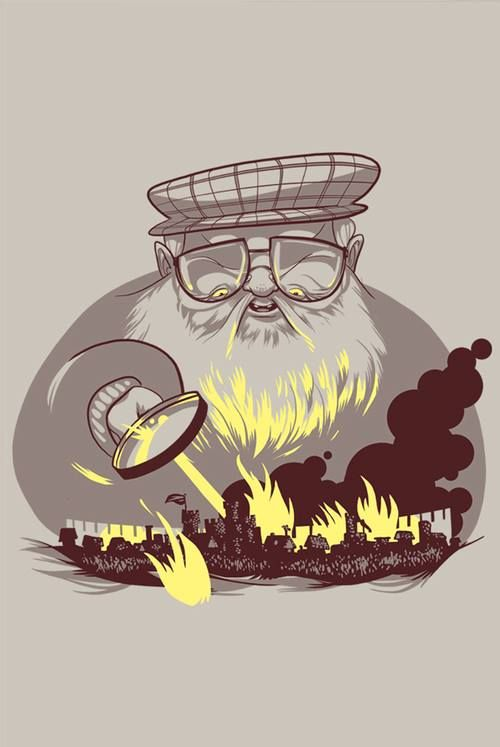

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [110]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 66.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 93.9MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [112]:
data = pd.read_csv('/content/game_of_thrones_train.csv', index_col='S.No')
data_test = pd.read_csv('/content/game_of_thrones_test.csv', index_col='S.No')
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [114]:
data.isna().sum(axis=0)

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [115]:
data.isna().sum(axis=0)

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


Смотрим процент нулевых значений в каждой колонке

In [116]:
null_percentages = data.isna().mean() * 100
print(null_percentages.round(3).to_string())

name                 0.000
title               53.950
male                 0.000
culture             68.658
dateOfBirth         82.081
mother              98.844
father              98.587
heir                98.651
house               24.470
spouse              87.155
book1                0.000
book2                0.000
book3                0.000
book4                0.000
book5                0.000
isAliveMother       98.844
isAliveFather       98.587
isAliveHeir         98.651
isAliveSpouse       87.155
isMarried            0.000
isNoble              0.000
age                 82.081
numDeadRelations     0.000
popularity           0.000
isAlive              0.000


Я решил удалить все колонки, где 80%+ данных состоят в нулевых значениях, кроме колонки age. Думая она может быть полезна, если все нулевые значения заменить на медиану.

In [117]:
data.drop(columns=['mother', 'father', 'heir', 'spouse',
                   'isAliveMother', 'isAliveFather',
                   'isAliveHeir', 'isAliveSpouse',
                   'dateOfBirth'], inplace=True)
data_test.drop(columns=['mother', 'father', 'heir', 'spouse',
                   'isAliveMother', 'isAliveFather',
                   'isAliveHeir', 'isAliveSpouse',
                   'dateOfBirth'], inplace=True)

In [118]:
data.head(5)

,name,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,0,0,0,0,0,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,House Frey,1,1,1,1,1,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,House Swyft,0,0,0,1,0,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,House Arryn,0,0,0,0,0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,House Santagar,0,0,0,1,0,1,1,29.0,0,0.043478,1


In [119]:
data.dropna(subset=['culture'])['isAlive'].value_counts()

,count
isAlive,
1,377
0,111


Заменяем нулевые значения в колонках title и house на моду, в колонке age на медиану.

In [120]:
data.fillna({'title': data['title'].mode().values[0]}, inplace=True)
data.fillna({'house': data['house'].mode().values[0]}, inplace=True)
data.fillna({'age': np.quantile(data['age'].dropna().values, q=0.5)}, inplace=True)

data_test.fillna({'title': data['title'].mode().values[0]}, inplace=True)
data_test.fillna({'house': data['house'].mode().values[0]}, inplace=True)
data_test.fillna({'age': np.quantile(data['age'].dropna().values, q=0.5)}, inplace=True)

In [121]:
null_percentages = data.isna().mean() * 100
print(null_percentages.round(3).to_string())

name                 0.000
title                0.000
male                 0.000
culture             68.658
house                0.000
book1                0.000
book2                0.000
book3                0.000
book4                0.000
book5                0.000
isMarried            0.000
isNoble              0.000
age                  0.000
numDeadRelations     0.000
popularity           0.000
isAlive              0.000


Осталось поработать со значениями в колонке culture, но для начала я его упрощу.

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [122]:
data['isPopular'] = (data['popularity'] >= 0.5).astype(np.int64)
data['boolDeadRelations'] = (data['numDeadRelations'] > 0).astype(np.int64)

data_test['isPopular'] = (data_test['popularity'] >= 0.5).astype(np.int64)
data_test['boolDeadRelations'] = (data_test['numDeadRelations'] > 0).astype(np.int64)

data

,name,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Ser,1,NaN,House Frey,0,0,0,0,0,0,0,24.0,11,0.605351,0,1,1
2,Walder Frey,Lord of the Crossing,1,Rivermen,House Frey,1,1,1,1,1,1,1,97.0,1,0.896321,1,1,1
3,Addison Hill,Ser,1,NaN,House Swyft,0,0,0,1,0,0,1,24.0,0,0.267559,1,0,0
4,Aemma Arryn,Queen,0,NaN,House Arryn,0,0,0,0,0,1,1,23.0,0,0.183946,0,0,0
5,Sylva Santagar,Greenstone,0,Dornish,House Santagar,0,0,0,1,0,1,1,29.0,0,0.043478,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,House Frey,1,0,1,1,0,0,1,24.0,0,0.160535,1,0,0
1554,Masha Heddle,Ser,0,NaN,House Frey,1,1,0,0,0,0,0,24.0,0,0.040134,0,0,0
1555,Matthos Seaworth,Ser,1,NaN,House Seaworth,0,1,1,1,1,0,0,24.0,0,0.076923,0,0,0


In [123]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Asshai': ["asshai'i", 'asshai'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk', 'wildlings'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    'Ironborn': ['ironborn', 'ironmen'],
    'Lhazareen': ['lhazareen', 'lhazarene'],
    'Valemen': ['vale', 'valemen'],
    'Meereen': ['mereen', 'meereenese'],
    'Rivermen': ['rivermen', 'riverlands'],
    'Astapori': ['astapori', 'astapor'],
    #'Other': ['lhazareen', 'rhoynar', 'naathi', 'ibbenese']

}

def get_new_cult(curr):
  for key, value in cult.items():
    if curr.lower() in value:
      return key
  return curr

for i in data['culture'].dropna().index:
    data.loc[i, ['culture']] = get_new_cult(data.loc[i, 'culture'])

for i in data_test['culture'].dropna().index:
    data_test.loc[i, ['culture']] = get_new_cult(data_test.loc[i, 'culture'])

data

,name,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Ser,1,NaN,House Frey,0,0,0,0,0,0,0,24.0,11,0.605351,0,1,1
2,Walder Frey,Lord of the Crossing,1,Rivermen,House Frey,1,1,1,1,1,1,1,97.0,1,0.896321,1,1,1
3,Addison Hill,Ser,1,NaN,House Swyft,0,0,0,1,0,0,1,24.0,0,0.267559,1,0,0
4,Aemma Arryn,Queen,0,NaN,House Arryn,0,0,0,0,0,1,1,23.0,0,0.183946,0,0,0
5,Sylva Santagar,Greenstone,0,Dornish,House Santagar,0,0,0,1,0,1,1,29.0,0,0.043478,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,House Frey,1,0,1,1,0,0,1,24.0,0,0.160535,1,0,0
1554,Masha Heddle,Ser,0,NaN,House Frey,1,1,0,0,0,0,0,24.0,0,0.040134,0,0,0
1555,Matthos Seaworth,Ser,1,NaN,House Seaworth,0,1,1,1,1,0,0,24.0,0,0.076923,0,0,0


Заменю все нулевые значения на моду.

In [124]:
data.fillna({'culture': 'No Culture'}, inplace=True)
data_test.fillna({'culture': 'No Culture'}, inplace=True)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

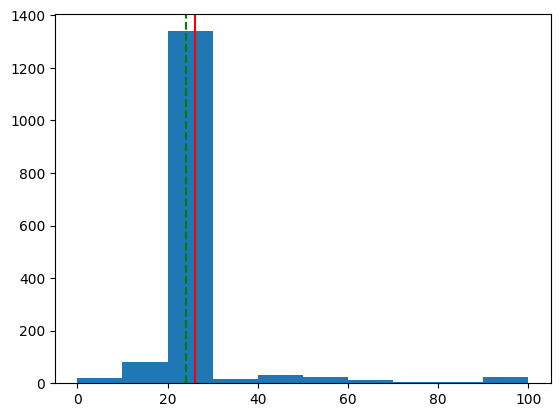

In [125]:
mean_Age = np.mean(data['age'].dropna().values)
median_Age = np.quantile(data['age'].dropna().values,q=0.5)

plt.hist(data['age'])

plt.axvline(x=mean_Age, color='r', linestyle = '-', label='mean')
plt.axvline(x=median_Age, color='g', linestyle = '--', label='median')

plt.show()

<Axes: >

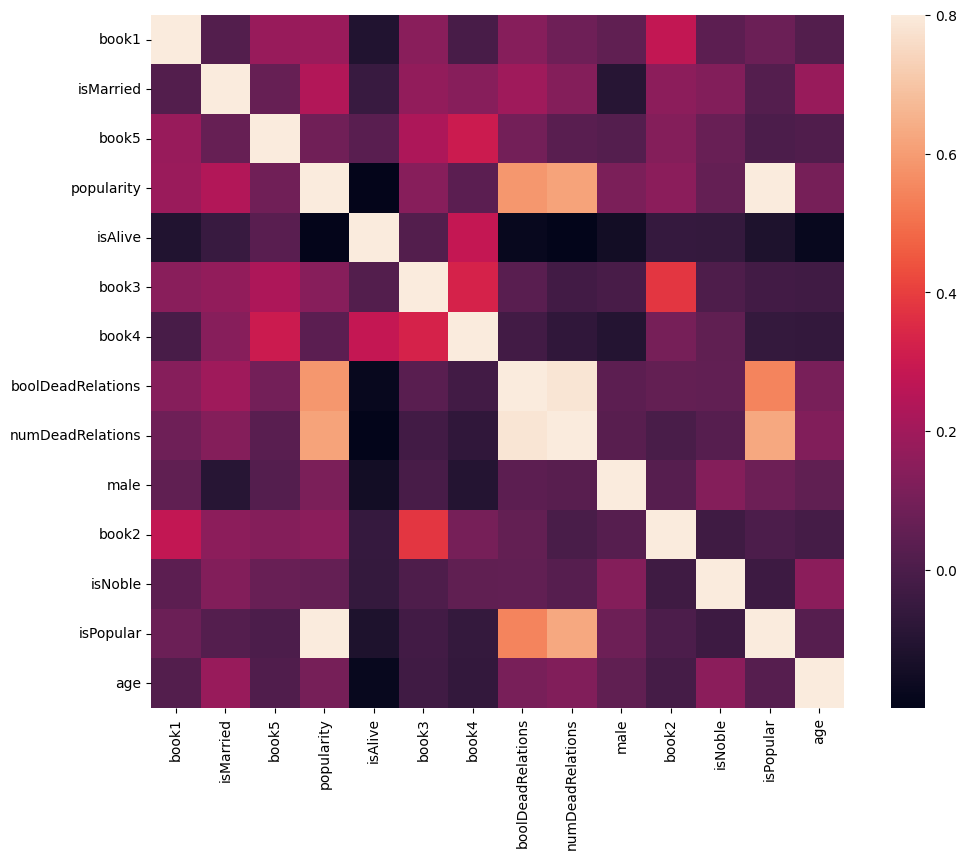

In [126]:
corrmat = data[list(set(data.columns) - set(['name', 'title', 'culture', 'house']))].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

Полное имя героя нам мало поможет, ведь дом персонажа вынесен в отдельную колонку. Заметна сильная корреляция между numDeadRelations и boolDeadRelation, popularity и isPopular, что очевидно тк одни признаки я создал из других.


In [127]:
data.drop(columns=['name', 'popularity', 'numDeadRelations'], inplace = True)
data_test.drop(columns=['name', 'popularity', 'numDeadRelations'], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [128]:
data['isAlive'].value_counts()

,count
isAlive,
1,1212
0,345


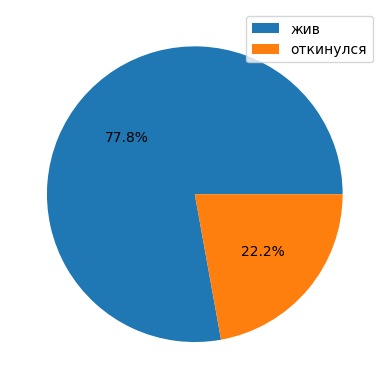

In [129]:
# Готовим данные для графика
df = data['isAlive'].value_counts()

# Строим круговую диаграмму
wedges, texts, autotexts = plt.pie(df, autopct='%1.1f%%')

plt.legend(wedges, ['жив', 'откинулся'], loc='upper right')

plt.show()

Видно сильный дисбаланс в сторону класса живых

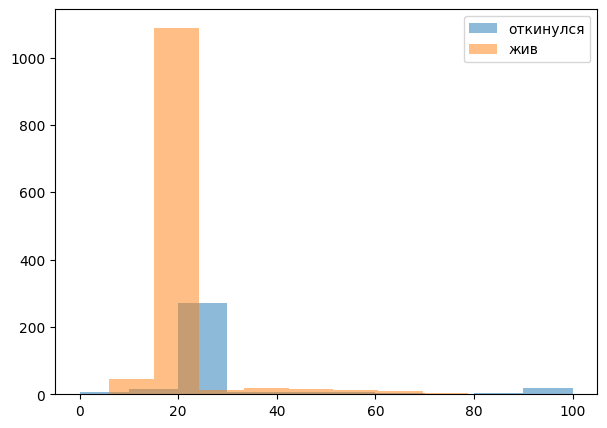

In [130]:
plt.figure(figsize=(7, 5))

plt.hist(data['age'][data['isAlive'] == 0], alpha=0.5, label='откинулся')
plt.hist(data['age'][data['isAlive'] == 1], alpha=0.5, label='жив')

plt.legend()

plt.show()

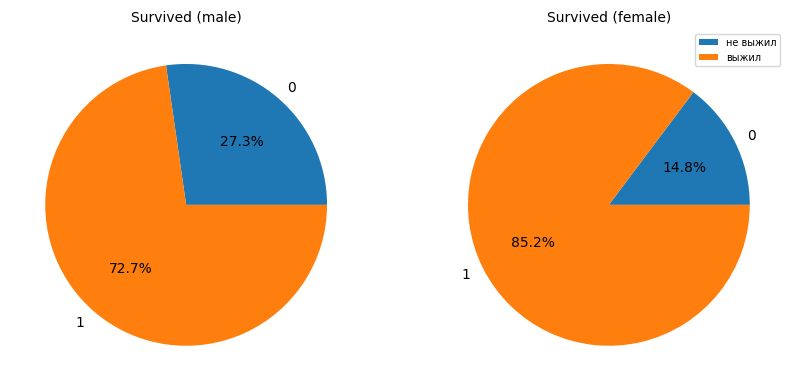

In [131]:
# female - 0, male - 1
data_1 = data[data['male']== 1]['isAlive'].value_counts().sort_values()
data_2 = data[data['male']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('Survived (male)', fontsize=10)
ax2.set_title('Survived (female)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()

Считаем, что переменная категориальная и сбалансированная

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [132]:
for column in ['title', 'culture', 'house']:
  print(f'{column} has {len(data[column].unique())} unique values')

title has 195 unique values
culture has 31 unique values
house has 315 unique values


In [133]:
from collections import defaultdict

def simplify_titles(titles):
    categories = defaultdict(list)

    for title in titles:
        title_lower = title.lower()

        if "king" in title_lower:
            categories["King"].append(title)
        elif "queen" in title_lower:
            categories["Queen"].append(title)
        elif "prince" in title_lower:
            categories["Prince"].append(title)
        elif "princess" in title_lower:
            categories["Princess"].append(title)
        elif "lord" in title_lower:
            categories["Lord"].append(title)
        elif "lady" in title_lower:
            categories["Lady"].append(title)
        elif "maester" in title_lower:
            categories["Maester"].append(title)
        elif "knight" in title_lower:
            categories["Knight"].append(title)
        elif "captain" in title_lower:
            categories["Captain"].append(title)
        elif "master" in title_lower:
            categories["Master"].append(title)
        elif "steward" in title_lower:
            categories["Steward"].append(title)
        elif "commander" in title_lower:
            categories["Commander"].append(title)
        elif "protector" in title_lower:
            categories["Protector"].append(title)
        elif "septon" in title_lower or "septa" in title_lower:
            categories["Septon/Septa"].append(title)
        else:
            categories["Other"].append(title)

    return {key: len(value) for key, value in categories.items()}

simplify_titles(data["title"].unique())

{'Other': 112,
 'Lord': 35,
 'Queen': 5,
 'King': 9,
 'Maester': 3,
 'Prince': 6,
 'Lady': 4,
 'Septon/Septa': 2,
 'Steward': 2,
 'Master': 8,
 'Knight': 3,
 'Captain': 3,
 'Commander': 2,
 'Protector': 1}

In [134]:
titles_ranking = {
    'King': 1,
    'Queen': 2,
    'Prince': 3,
    'Princess': 4,
    'Protector': 5,
    'Lord': 6,
    'Lady': 7,
    'Commander': 8,
    'Captain': 9,
    'Knight': 10,
    'Steward': 11,
    'Master': 12,
    'Maester': 13,
    'Septon/Septa': 14,
    'Other': 15
}

def simplify_title(title):
    if "king" in title.lower():
        return titles_ranking["King"]
    elif "queen" in title.lower():
        return titles_ranking["Queen"]
    elif "prince" in title.lower():
        return titles_ranking["Prince"]
    elif "princess" in title.lower():
        return titles_ranking["Princess"]
    elif "lord" in title.lower():
        return titles_ranking["Lord"]
    elif "lady" in title.lower():
        return titles_ranking["Lady"]
    elif "maester" in title.lower():
        return titles_ranking["Maester"]
    elif "knight" in title.lower():
        return titles_ranking["Knight"]
    elif "captain" in title.lower():
        return titles_ranking["Captain"]
    elif "master" in title.lower():
        return titles_ranking["Master"]
    elif "steward" in title.lower():
        return titles_ranking["Steward"]
    elif "commander" in title.lower():
        return titles_ranking["Commander"]
    elif "protector" in title.lower():
        return titles_ranking["Protector"]
    elif "septon" in title.lower() or "septa" in title.lower():
        return titles_ranking["Septon/Septa"]
    else:
        return titles_ranking["Other"]

for i in range(data.shape[0]):
  data.loc[i + 1, ["title"]] = simplify_title(data.loc[i + 1, "title"])
for i in range(data_test.shape[0]):
  data_test.loc[i + 1558, ["title"]] = simplify_title(data_test.loc[i + 1558, "title"])

In [135]:
data['title'] = data['title'].astype(np.int64)
data_test['title'] = data_test['title'].astype(np.int64)

Заменили большое разнообразие титулов на их меньшее количество и ранжировали по званию

In [136]:
data[['culture', 'title']]

,culture,title
S.No,,
1,No Culture,15
2,Rivermen,6
3,No Culture,15
4,No Culture,2
5,Dornish,15
...,...,...
1553,No Culture,13
1554,No Culture,15
1555,No Culture,15


In [137]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder(handle_unknown='ignore')
culture_transformed = onehotencoder.fit_transform(data[['culture', 'house']])
culture_transformed_test = onehotencoder.transform(data_test[['culture', 'house']])
column_names = onehotencoder.get_feature_names_out()

In [138]:
new_data = pd.DataFrame(culture_transformed.todense(), columns=column_names)
new_data_test = pd.DataFrame(culture_transformed_test.todense(), columns=column_names)

In [139]:
new_data.index += 1
new_data_test.index += 1558

In [140]:
data_transformed = pd.concat((data, new_data), axis=1).drop(columns=['culture', 'house'])
data_transformed_test = pd.concat((data_test, new_data_test), axis=1).drop(columns=['culture', 'house'])

In [141]:
data_transformed

,title,male,book1,book2,book3,book4,book5,isMarried,isNoble,age,...,house_R'hllor,house_Sea watch,house_Second Sons,house_Stone Crows,house_Stormcrows,house_Summer Islands,house_The Citadel,house_Windblown,house_Wise Masters,house_wildling
1,15,1,0,0,0,0,0,0,0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,1,1,1,1,1,1,1,1,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15,1,0,0,0,1,0,0,1,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0,0,0,0,0,0,1,1,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,15,0,0,0,0,1,0,1,1,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,13,1,1,0,1,1,0,0,1,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1554,15,0,1,1,0,0,0,0,0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1555,15,1,0,1,1,1,1,0,0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1556,15,0,0,1,1,1,1,0,0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
data_transformed_test

,title,male,book1,book2,book3,book4,book5,isMarried,isNoble,age,...,house_R'hllor,house_Sea watch,house_Second Sons,house_Stone Crows,house_Stormcrows,house_Summer Islands,house_The Citadel,house_Windblown,house_Wise Masters,house_wildling
1558,15,0,0,0,0,0,1,0,0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1559,15,0,0,1,1,1,1,0,0,24.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1560,15,0,0,0,1,1,0,0,0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1561,15,1,1,1,1,1,1,0,1,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1562,15,1,1,1,1,1,1,1,0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,15,1,1,1,1,1,1,0,0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,15,1,0,1,0,1,1,0,0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1944,15,1,1,1,1,1,1,0,0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1945,15,1,0,0,1,1,1,0,0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

Посмотри на корреляцию первых 20 колонок

<Axes: >

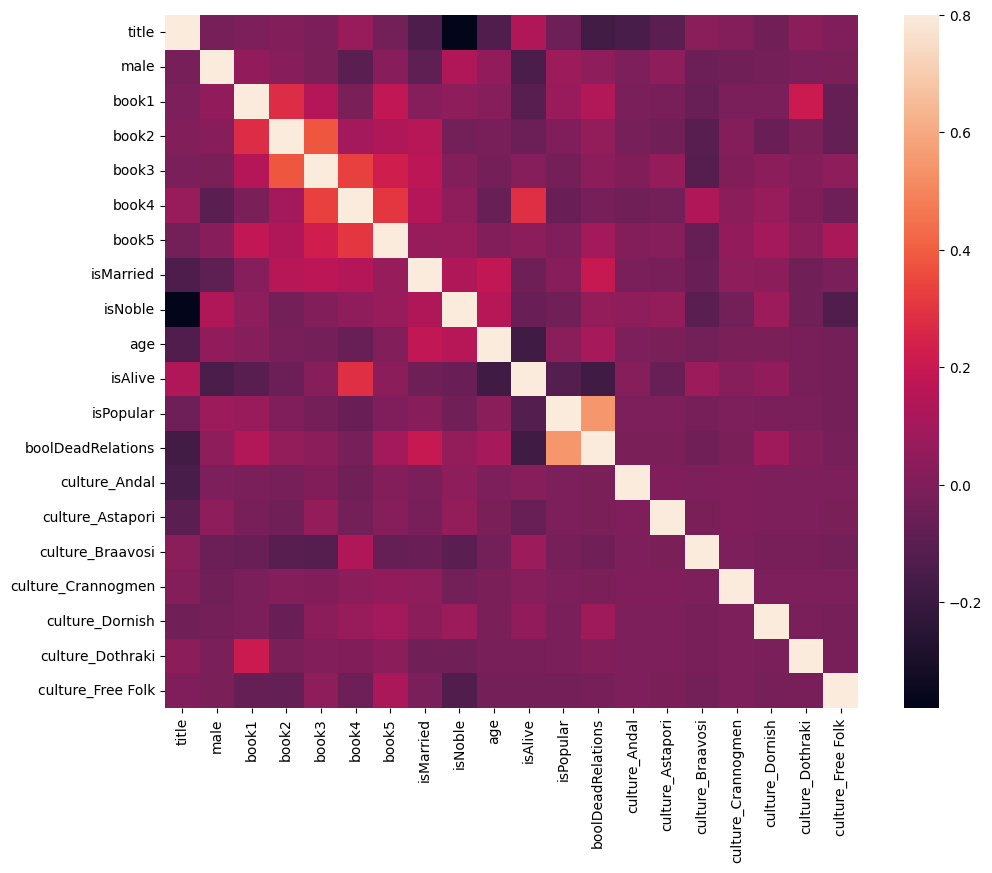

In [143]:
corrmat = data_transformed.iloc[:, :20].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

Как видно, между некоторыми признаками есть сильная отрицательная корреляция, а также положительная

In [144]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
age_transformed = minmax_scaler.fit_transform(data_transformed['age'].values.reshape((data.shape[0], 1)))
age_transformed_test = minmax_scaler.transform(data_transformed_test['age'].values.reshape((data_test.shape[0], 1)))

In [145]:
data_transformed['age'] = age_transformed
data_transformed_test['age'] = age_transformed_test

In [146]:
data_transformed

,title,male,book1,book2,book3,book4,book5,isMarried,isNoble,age,...,house_R'hllor,house_Sea watch,house_Second Sons,house_Stone Crows,house_Stormcrows,house_Summer Islands,house_The Citadel,house_Windblown,house_Wise Masters,house_wildling
1,15,1,0,0,0,0,0,0,0,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,1,1,1,1,1,1,1,1,0.97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15,1,0,0,0,1,0,0,1,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0,0,0,0,0,0,1,1,0.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,15,0,0,0,0,1,0,1,1,0.29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,13,1,1,0,1,1,0,0,1,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1554,15,0,1,1,0,0,0,0,0,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1555,15,1,0,1,1,1,1,0,0,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1556,15,0,0,1,1,1,1,0,0,0.22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
data_transformed_test

,title,male,book1,book2,book3,book4,book5,isMarried,isNoble,age,...,house_R'hllor,house_Sea watch,house_Second Sons,house_Stone Crows,house_Stormcrows,house_Summer Islands,house_The Citadel,house_Windblown,house_Wise Masters,house_wildling
1558,15,0,0,0,0,0,1,0,0,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1559,15,0,0,1,1,1,1,0,0,0.24,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1560,15,0,0,0,1,1,0,0,0,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1561,15,1,1,1,1,1,1,0,1,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1562,15,1,1,1,1,1,1,1,0,0.38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,15,1,1,1,1,1,1,0,0,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,15,1,0,1,0,1,1,0,0,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1944,15,1,1,1,1,1,1,0,0,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1945,15,1,0,0,1,1,1,0,0,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Таким образом мы преобразовали категориальные признаки с помощью OneHotEncoder, а столбец age с помощью MinMaxScaler

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [148]:
X = data_transformed.drop(columns=['isAlive'])
y = data_transformed['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    shuffle=True, random_state=42,
                                                    stratify=y)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [151]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [152]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [153]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [154]:
# Шаг 1. создание модели
ada_boost = AdaBoostClassifier()

# Шаг 2. обучение модели
ada_boost.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = ada_boost.predict(X_test)

In [155]:
random_forest = RandomForestClassifier()

# Шаг 2. обучение модели
random_forest.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = random_forest.predict(X_test)

In [156]:
gpc = GaussianProcessClassifier()

# Шаг 2. обучение модели
gpc.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = gpc.predict(X_test)

In [157]:
gnb = GaussianNB()

# Шаг 2. обучение модели
gnb.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = gnb.predict(X_test)

In [158]:
knn = KNeighborsClassifier()

# Шаг 2. обучение модели
knn.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = knn.predict(X_test)

In [159]:
svc = SVC()

# Шаг 2. обучение модели
svc.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = svc.predict(X_test)

In [160]:
dtc = DecisionTreeClassifier()

# Шаг 2. обучение модели
dtc.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = dtc.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [161]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [162]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7927


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [163]:
# Шаг 3. Предсказание на тестовых данных
y_pred = ada_boost.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7671


In [164]:
# Шаг 3. Предсказание на тестовых данных
y_pred = random_forest.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8120


In [165]:
# Шаг 3. Предсказание на тестовых данных
y_pred = gpc.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7927


In [166]:
# Шаг 3. Предсказание на тестовых данных
y_pred = gnb.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy : %.4f" % accuracy)

Accuracy : 0.3782


In [167]:
# Шаг 3. Предсказание на тестовых данных
y_pred = knn.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7842


In [168]:
# Шаг 3. Предсказание на тестовых данных
y_pred = svc.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7778


In [169]:
# Шаг 3. Предсказание на тестовых данных
y_pred = dtc.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7927


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [170]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 11.5MB/s]


In [171]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [172]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [173]:
data_transformed_test

,title,male,book1,book2,book3,book4,book5,isMarried,isNoble,age,...,house_R'hllor,house_Sea watch,house_Second Sons,house_Stone Crows,house_Stormcrows,house_Summer Islands,house_The Citadel,house_Windblown,house_Wise Masters,house_wildling
1558,15,0,0,0,0,0,1,0,0,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1559,15,0,0,1,1,1,1,0,0,0.24,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1560,15,0,0,0,1,1,0,0,0,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1561,15,1,1,1,1,1,1,0,1,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1562,15,1,1,1,1,1,1,1,0,0.38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,15,1,1,1,1,1,1,0,0,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,15,1,0,1,0,1,1,0,0,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1944,15,1,1,1,1,1,1,0,0,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1945,15,1,0,0,1,1,1,0,0,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
y_pred = ada_boost.predict(data_transformed_test)

In [175]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [176]:
sub = pd.DataFrame(y_pred, index=data_transformed_test.index, columns=['isAlive'])
sub.index.name = 'S.No'
sub

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


In [177]:
sub.to_csv("/content/new_submission.csv", index=False)

In [178]:
y_pred = knn.predict(data_transformed_test)

In [179]:
sub = pd.DataFrame(y_pred, index=data_transformed_test.index, columns=['isAlive'])
sub.index.name = 'S.No'
sub

,isAlive
S.No,
1558,1
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,0
1944,1


In [180]:
sub.to_csv("/content/new_submission.csv", index=False)

Далее подберем гиперпараметры для Случайного леса

In [181]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [182]:
X.shape

(1557, 358)

In [183]:
y.shape

(1557,)

In [184]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()
params = {'n_estimators': list(range(5, 106, 10)),
          'max_depth': list(range(5, 31, 5))}
clf = GridSearchCV(model, params, scoring='accuracy', cv=5)

In [185]:
clf.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30],
                         'n_estimators': [5, 15, 25, 35, 45, 55, 65, 75, 85, 95,
                                          105]},
             scoring='accuracy')

In [186]:
clf.best_score_

0.816310083271498

In [187]:
best_model = clf.best_estimator_
best_model

RandomForestClassifier(max_depth=25, n_estimators=95)

In [188]:
feature_names = data_transformed.columns
feature_importances = {}
for i in range(len(best_model.feature_importances_)):
  feature_importances[feature_names[i]] = best_model.feature_importances_[i]
feature_importances = dict(sorted(feature_importances.items(), key=lambda item: item[1], reverse=True))

i = 0
for key, value in feature_importances.items():
  print(f'{key} - {value}')
  i += 1
  if i == 20:
    break

age - 0.11089505000909178
book4 - 0.09198865526778668
title - 0.04627791187585791
male - 0.04358978484796391
book3 - 0.03548850087963657
book5 - 0.03456233744119249
book1 - 0.03335882952576667
isPopular - 0.031547967499137984
book2 - 0.031157724512799682
house_House Tallhart - 0.029363327849669208
culture_Valemen - 0.02825832757827463
isNoble - 0.02624880082880551
house_Moon Brothers - 0.0232661914301284
isMarried - 0.022119197516887637
isAlive - 0.020156386684497946
culture_Myrish - 0.019534477384213916
house_House Fowler - 0.016953482246141804
house_House Greenhill - 0.011939108022785472
house_House Staedmon - 0.008809560898376973
house_House Sawyer - 0.008744664298645346


In [189]:
y_pred = best_model.predict(data_transformed_test.to_numpy())

In [190]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [191]:
sub = pd.DataFrame(y_pred, index=data_transformed_test.index, columns=['isAlive'])
sub.index.name = 'S.No'
sub

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


In [192]:
sub.to_csv("/content/new_submission.csv", index=False)